In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
df = pd.read_csv("../../datasets/IndiaDataset/india_inflation_dataset.csv")
print(df.head())

         Date       CPI  GDP_Growth  Unemployment_Rate  Crude_Oil_Prices  \
0  2007-01-31  5.745071    6.715575           5.086687         81.354829   
1  2007-02-28  4.792604    7.121569           6.280750         56.167520   
2  2007-03-31  5.971533    8.166102           7.006292         83.044089   
3  2007-04-30  7.284545    8.107604           7.056377         90.334568   
4  2007-05-31  4.648770    3.244661           6.459921         76.201524   

   Gold_Prices  Real_Estate_Index   Stock_Index  Money_Supply_M1  \
0  1687.656761         140.990332  40626.122513         6.859267   
1  1396.791054         133.869505  37852.972294        11.609958   
2  1519.224155         120.894456  40611.487515        13.557112   
3  1407.544942         110.295948  42716.490145        12.156860   
4  1413.100755         130.473350  40244.300352        12.988143   

   Money_Supply_M2  Industrial_Production  Retail_Sales  Exchange_Rate  
0        11.451311               8.802381      6.649643      

In [5]:
print(df.shape)
print(" Columns : ",df.columns)

(200, 13)
 Columns :  Index(['Date', 'CPI', 'GDP_Growth', 'Unemployment_Rate', 'Crude_Oil_Prices',
       'Gold_Prices', 'Real_Estate_Index', 'Stock_Index', 'Money_Supply_M1',
       'Money_Supply_M2', 'Industrial_Production', 'Retail_Sales',
       'Exchange_Rate'],
      dtype='object')


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   200 non-null    object 
 1   CPI                    200 non-null    float64
 2   GDP_Growth             200 non-null    float64
 3   Unemployment_Rate      200 non-null    float64
 4   Crude_Oil_Prices       200 non-null    float64
 5   Gold_Prices            200 non-null    float64
 6   Real_Estate_Index      200 non-null    float64
 7   Stock_Index            200 non-null    float64
 8   Money_Supply_M1        200 non-null    float64
 9   Money_Supply_M2        200 non-null    float64
 10  Industrial_Production  200 non-null    float64
 11  Retail_Sales           200 non-null    float64
 12  Exchange_Rate          200 non-null    float64
dtypes: float64(12), object(1)
memory usage: 20.4+ KB
None


In [7]:
print(df.describe())

              CPI  GDP_Growth  Unemployment_Rate  Crude_Oil_Prices  \
count  200.000000  200.000000         200.000000        200.000000   
mean     4.938844    6.171736           6.897214         70.134500   
std      1.396506    1.974008           1.192850         15.293615   
min      1.070382   -0.482535           4.034027         29.546700   
25%      3.942308    4.788325           6.047346         59.402962   
50%      4.993712    6.157679           6.906880         70.333937   
75%      5.751279    7.374462           7.686506         80.277657   
max      9.080254   13.705463          10.694657        109.485731   

       Gold_Prices  Real_Estate_Index   Stock_Index  Money_Supply_M1  \
count   200.000000         200.000000    200.000000       200.000000   
mean   1525.650289         122.004495  40026.872467        10.247891   
std     191.186639          15.454829   4930.998917         3.104900   
min    1015.224135          76.556169  27044.788539         1.235949   
25%    13

In [11]:
print("Highest inflation year:")
print(df.loc[df['CPI'].idxmax()])

Highest inflation year:
Date                       2021-12-31
CPI                          9.080254
GDP_Growth                   4.383403
Unemployment_Rate            8.372505
Crude_Oil_Prices            79.310081
Gold_Prices               1652.082931
Real_Estate_Index           103.44616
Stock_Index              49130.048568
Money_Supply_M1              7.569243
Money_Supply_M2              9.922737
Industrial_Production        5.814105
Retail_Sales                   8.0136
Exchange_Rate               76.301403
Name: 179, dtype: object


In [14]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Year']

0      2007
1      2007
2      2007
3      2007
4      2007
       ... 
195    2023
196    2023
197    2023
198    2023
199    2023
Name: Year, Length: 200, dtype: int32

In [15]:
df1 = df[(df['Year'] >= 2006) & (df['Year'] <= 2015)]
df1

,Date,CPI,GDP_Growth,Unemployment_Rate,Crude_Oil_Prices,Gold_Prices,Real_Estate_Index,Stock_Index,Money_Supply_M1,Money_Supply_M2,Industrial_Production,Retail_Sales,Exchange_Rate,Year
0,2007-01-31,5.745071,6.715575,5.086687,81.354829,1687.656761,140.990332,40626.122513,6.859267,11.451311,8.802381,6.649643,84.021741,2007
1,2007-02-28,4.792604,7.121569,6.280750,56.167520,1396.791054,133.869505,37852.972294,11.609958,16.124629,4.878678,7.710963,74.045481,2007
2,2007-03-31,5.971533,8.166102,7.006292,83.044089,1519.224155,120.894456,40611.487515,13.557112,10.062107,3.583186,6.415160,78.598790,2007
3,2007-04-30,7.284545,8.107604,7.056377,90.334568,1407.544942,110.295948,42716.490145,12.156860,9.602424,1.972571,7.384077,68.533635,2007
4,2007-05-31,4.648770,3.244661,6.459921,76.201524,1413.100755,130.473350,40244.300352,12.988143,10.551769,1.393721,4.212771,70.217818,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2015-08-31,3.796584,7.220741,7.675563,48.873081,1755.690373,117.906156,36221.274203,9.989877,15.329100,5.739284,10.250870,76.251001,2015
104,2015-09-30,4.758071,5.958197,6.219229,46.650562,1538.219814,136.622742,42682.549218,9.489446,13.229456,4.785396,5.621176,84.978337,2015
105,2015-10-31,5.606076,6.234655,6.415450,79.090149,1509.287310,104.401411,35507.660091,8.640316,11.276227,5.895434,11.285346,90.549593,2015
106,2015-11-30,7.829279,8.555330,6.289127,50.793560,1228.028772,129.191609,40140.905787,12.089162,14.017721,1.858248,6.198759,78.033615,2015


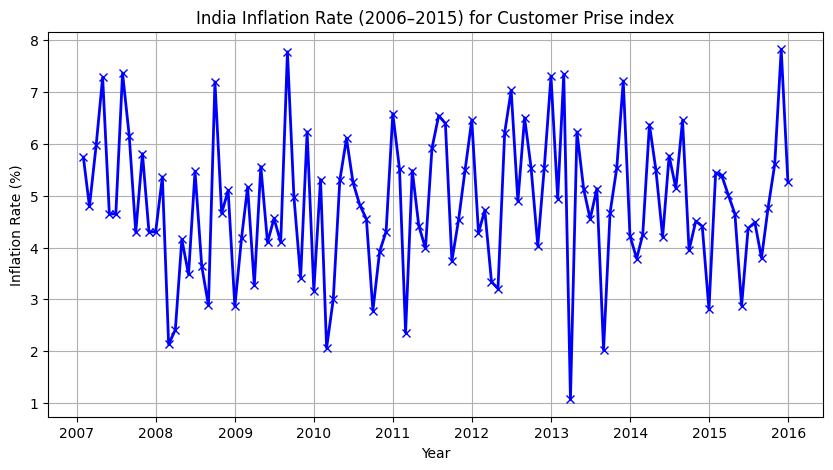

In [30]:
plt.figure(figsize=(10,5))
plt.plot(df1['Date'], df1['CPI'], marker='x',linewidth=2, color='blue')
plt.title('India Inflation Rate (2006–2015) for Customer Prise index')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.grid(True)
plt.show()

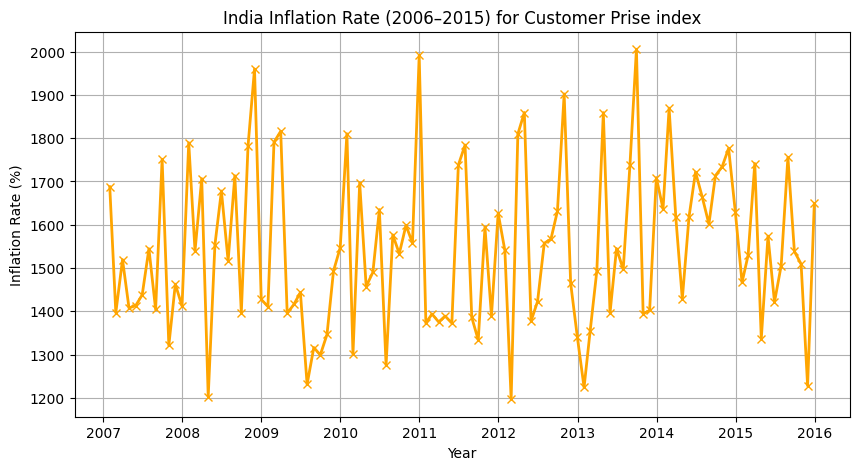

In [35]:
plt.figure(figsize=(10,5))
plt.plot(df1['Date'], df1['Gold_Prices'], marker='x',linewidth=2, color='orange')
plt.title('India Inflation Rate (2006–2015) for Customer Prise index')
plt.xlabel('Year')
plt.ylabel('Inflation Rate CPI (%)')
plt.grid(True)
plt.show()

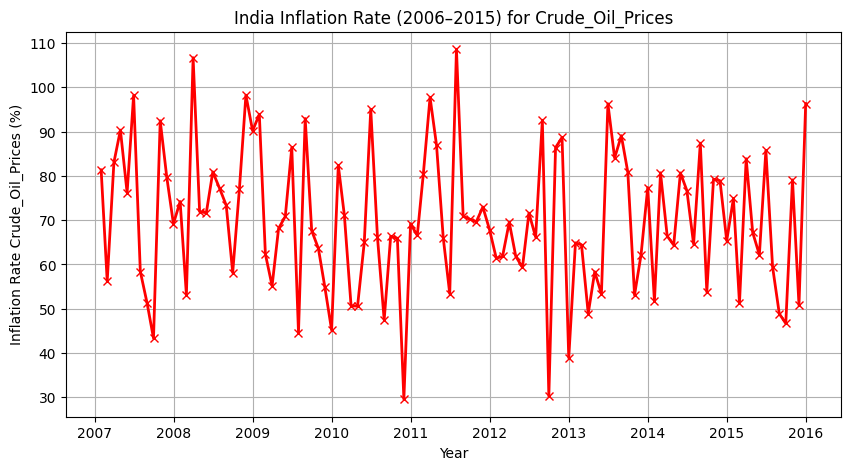

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df1['Date'], df1[' Crude_Oil_Prices'], marker='x',linewidth=2, color='red')
plt.title('India Inflation Rate (2006–2015) for Crude_Oil_Prices')
plt.xlabel('Year')
plt.ylabel('Inflation Rate Crude_Oil_Prices (%)')
plt.grid(True)
plt.show()

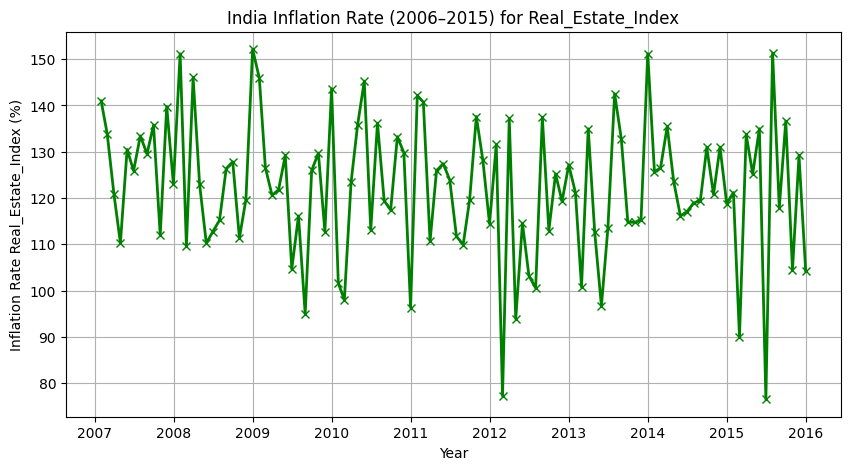

In [43]:
plt.figure(figsize=(10,5))
plt.plot(df1['Date'], df1['Real_Estate_Index'], marker='x',linewidth=2, color='green')
plt.title('India Inflation Rate (2006–2015) for Real_Estate_Index')
plt.xlabel('Year')
plt.ylabel('Inflation Rate Real_Estate_Index (%)')
plt.grid(True)
plt.show()

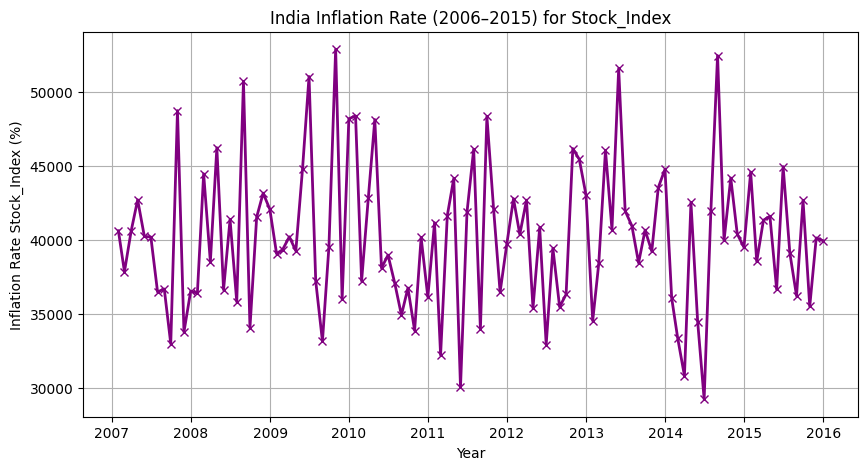

In [44]:
plt.figure(figsize=(10,5))
plt.plot(df1['Date'], df1['Stock_Index'], marker='x',linewidth=2, color='purple')
plt.title('India Inflation Rate (2006–2015) for Stock_Index')
plt.xlabel('Year')
plt.ylabel('Inflation Rate Stock_Index (%)')
plt.grid(True)
plt.show()

In [20]:
df2 = df[(df['Year'] >= 2016) & (df['Year'] <= 2023)]
df2

,Date,CPI,GDP_Growth,Unemployment_Rate,Crude_Oil_Prices,Gold_Prices,Real_Estate_Index,Stock_Index,Money_Supply_M1,Money_Supply_M2,Industrial_Production,Retail_Sales,Exchange_Rate,Year
108,2016-01-31,5.386326,7.094195,7.058226,38.771059,1629.096836,110.643466,45429.477829,10.265221,11.602099,2.612150,7.342763,77.672528,2016
109,2016-02-29,4.888331,5.595615,6.002860,95.446846,1932.650945,148.710470,42373.491164,14.432590,9.076412,5.285886,9.206375,79.438277,2016
110,2016-03-31,2.121843,5.564638,7.324548,73.165262,1438.444353,117.139764,39874.865206,6.574933,15.321242,8.465030,6.911772,73.396662,2016
111,2016-04-30,4.960229,8.197554,6.939714,68.549303,1543.830066,123.261493,44088.831496,9.419022,11.638857,9.462600,7.674414,83.976057,2016
112,2016-05-31,5.090345,7.650833,6.713262,61.826214,1549.876737,133.051016,46951.037745,7.849533,5.481991,6.276102,8.081838,76.150354,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2023-04-30,5.577976,5.061649,6.387980,85.797293,1443.779941,126.607121,40923.401529,6.970808,9.744092,7.140300,6.676036,67.751774,2023
196,2023-05-31,3.674214,2.573731,6.676150,69.406673,1859.537305,119.705433,33264.368552,11.857463,11.042838,4.946957,8.851774,70.390701,2023
197,2023-06-30,5.230588,8.707745,5.825484,80.222510,1628.168572,128.287349,35141.929807,16.172486,9.611922,3.236251,8.038296,69.980213,2023
198,2023-07-31,5.087313,5.770920,6.466848,70.424776,1385.764202,123.358712,46002.069540,10.062381,15.228021,4.673866,6.717026,76.036337,2023


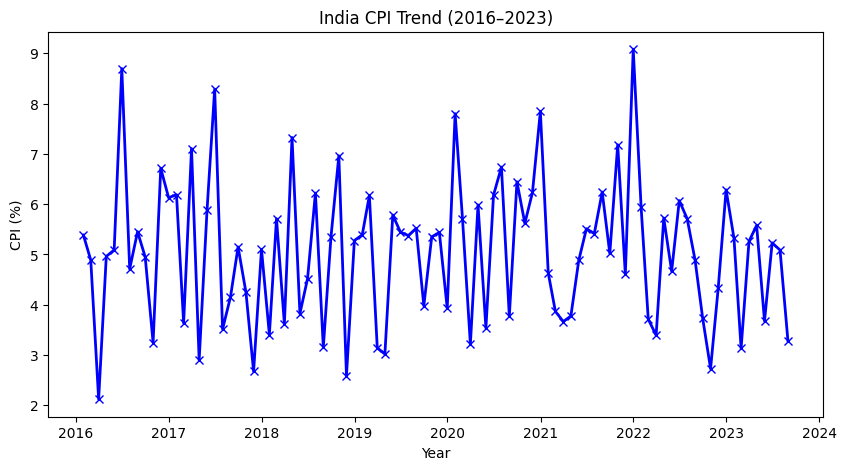

In [39]:
plt.figure(figsize=(10,5))
plt.plot(df2['Date'], df2['CPI'], marker='x', linewidth=2, color='blue')
plt.title('India CPI Trend (2016–2023)')
plt.xlabel('Year')
plt.ylabel('CPI (%)')
plt.show()

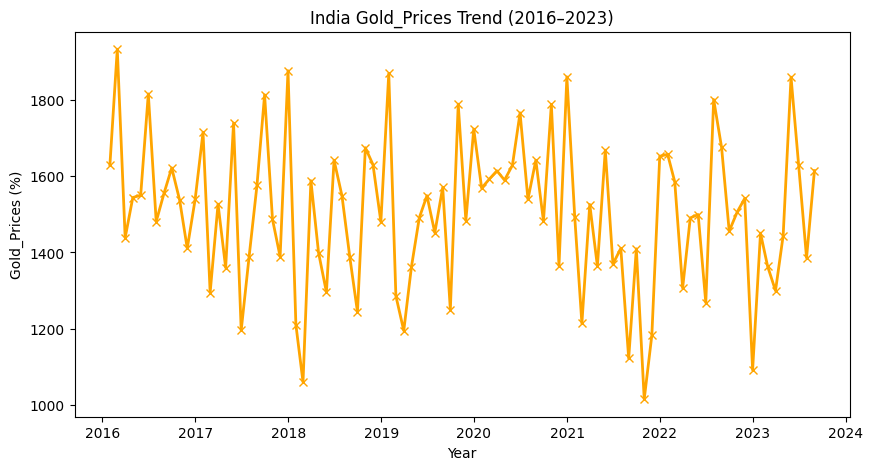

In [45]:
plt.figure(figsize=(10,5))
plt.plot(df2['Date'], df2['Gold_Prices'], marker='x', linewidth=2, color='orange')
plt.title('India Gold_Prices Trend (2016–2023)')
plt.xlabel('Year')
plt.ylabel('Gold_Prices (%)')
plt.show()

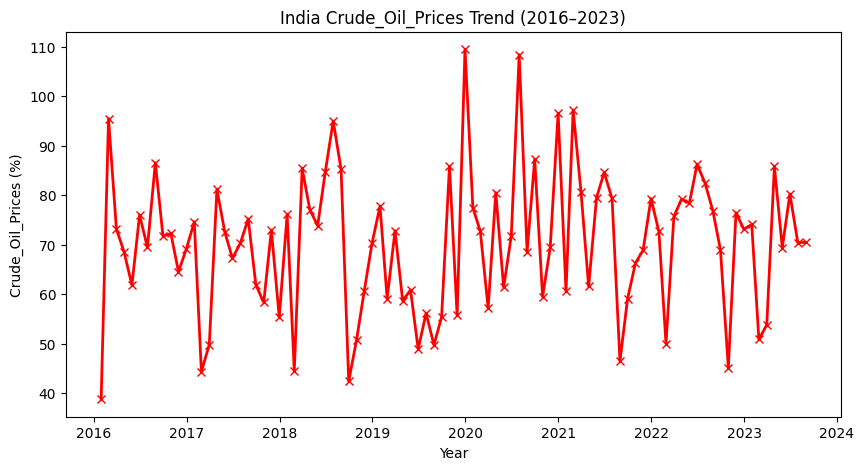

In [46]:
plt.figure(figsize=(10,5))
plt.plot(df2['Date'], df2['Crude_Oil_Prices'], marker='x', linewidth=2, color='red')
plt.title('India Crude_Oil_Prices Trend (2016–2023)')
plt.xlabel('Year')
plt.ylabel('Crude_Oil_Prices (%)')
plt.show()

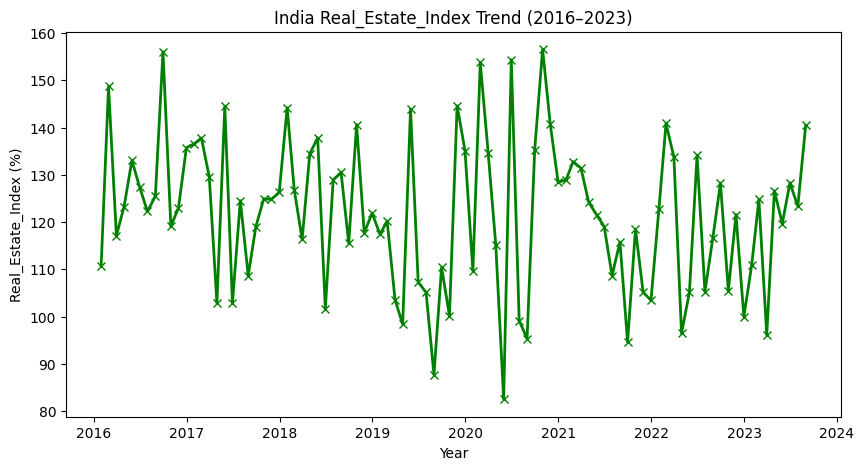

In [47]:
plt.figure(figsize=(10,5))
plt.plot(df2['Date'], df2['Real_Estate_Index'], marker='x', linewidth=2, color='green')
plt.title('India Real_Estate_Index Trend (2016–2023)')
plt.xlabel('Year')
plt.ylabel('Real_Estate_Index (%)')
plt.show()

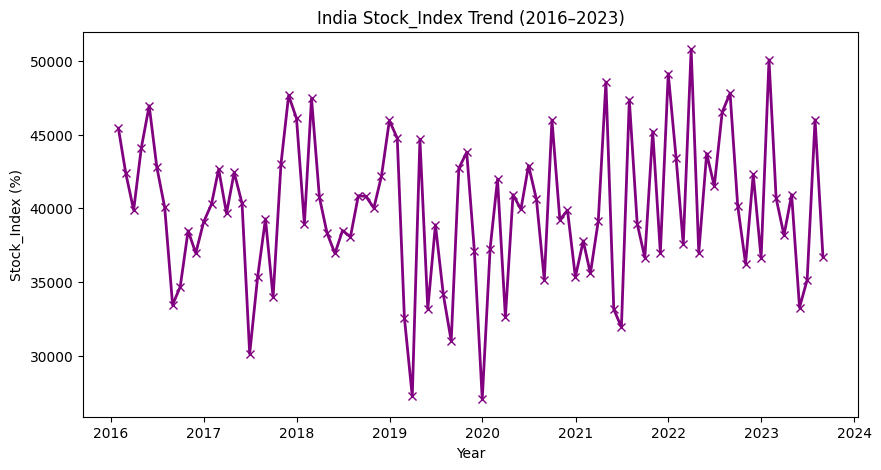

In [48]:
plt.figure(figsize=(10,5))
plt.plot(df2['Date'], df2['Stock_Index'], marker='x', linewidth=2, color='purple')
plt.title('India Stock_Index Trend (2016–2023)')
plt.xlabel('Year')
plt.ylabel('Stock_Index (%)')
plt.show()

In [50]:
df1

,Date,CPI,GDP_Growth,Unemployment_Rate,Crude_Oil_Prices,Gold_Prices,Real_Estate_Index,Stock_Index,Money_Supply_M1,Money_Supply_M2,Industrial_Production,Retail_Sales,Exchange_Rate,Year
0,2007-01-31,5.745071,6.715575,5.086687,81.354829,1687.656761,140.990332,40626.122513,6.859267,11.451311,8.802381,6.649643,84.021741,2007
1,2007-02-28,4.792604,7.121569,6.280750,56.167520,1396.791054,133.869505,37852.972294,11.609958,16.124629,4.878678,7.710963,74.045481,2007
2,2007-03-31,5.971533,8.166102,7.006292,83.044089,1519.224155,120.894456,40611.487515,13.557112,10.062107,3.583186,6.415160,78.598790,2007
3,2007-04-30,7.284545,8.107604,7.056377,90.334568,1407.544942,110.295948,42716.490145,12.156860,9.602424,1.972571,7.384077,68.533635,2007
4,2007-05-31,4.648770,3.244661,6.459921,76.201524,1413.100755,130.473350,40244.300352,12.988143,10.551769,1.393721,4.212771,70.217818,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2015-08-31,3.796584,7.220741,7.675563,48.873081,1755.690373,117.906156,36221.274203,9.989877,15.329100,5.739284,10.250870,76.251001,2015
104,2015-09-30,4.758071,5.958197,6.219229,46.650562,1538.219814,136.622742,42682.549218,9.489446,13.229456,4.785396,5.621176,84.978337,2015
105,2015-10-31,5.606076,6.234655,6.415450,79.090149,1509.287310,104.401411,35507.660091,8.640316,11.276227,5.895434,11.285346,90.549593,2015
106,2015-11-30,7.829279,8.555330,6.289127,50.793560,1228.028772,129.191609,40140.905787,12.089162,14.017721,1.858248,6.198759,78.033615,2015


In [51]:
df2

,Date,CPI,GDP_Growth,Unemployment_Rate,Crude_Oil_Prices,Gold_Prices,Real_Estate_Index,Stock_Index,Money_Supply_M1,Money_Supply_M2,Industrial_Production,Retail_Sales,Exchange_Rate,Year
108,2016-01-31,5.386326,7.094195,7.058226,38.771059,1629.096836,110.643466,45429.477829,10.265221,11.602099,2.612150,7.342763,77.672528,2016
109,2016-02-29,4.888331,5.595615,6.002860,95.446846,1932.650945,148.710470,42373.491164,14.432590,9.076412,5.285886,9.206375,79.438277,2016
110,2016-03-31,2.121843,5.564638,7.324548,73.165262,1438.444353,117.139764,39874.865206,6.574933,15.321242,8.465030,6.911772,73.396662,2016
111,2016-04-30,4.960229,8.197554,6.939714,68.549303,1543.830066,123.261493,44088.831496,9.419022,11.638857,9.462600,7.674414,83.976057,2016
112,2016-05-31,5.090345,7.650833,6.713262,61.826214,1549.876737,133.051016,46951.037745,7.849533,5.481991,6.276102,8.081838,76.150354,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2023-04-30,5.577976,5.061649,6.387980,85.797293,1443.779941,126.607121,40923.401529,6.970808,9.744092,7.140300,6.676036,67.751774,2023
196,2023-05-31,3.674214,2.573731,6.676150,69.406673,1859.537305,119.705433,33264.368552,11.857463,11.042838,4.946957,8.851774,70.390701,2023
197,2023-06-30,5.230588,8.707745,5.825484,80.222510,1628.168572,128.287349,35141.929807,16.172486,9.611922,3.236251,8.038296,69.980213,2023
198,2023-07-31,5.087313,5.770920,6.466848,70.424776,1385.764202,123.358712,46002.069540,10.062381,15.228021,4.673866,6.717026,76.036337,2023


In [52]:
df4 = df[(df['Year'] >= 2006) & (df['Year'] <= 2023)]
df4

,Date,CPI,GDP_Growth,Unemployment_Rate,Crude_Oil_Prices,Gold_Prices,Real_Estate_Index,Stock_Index,Money_Supply_M1,Money_Supply_M2,Industrial_Production,Retail_Sales,Exchange_Rate,Year
0,2007-01-31,5.745071,6.715575,5.086687,81.354829,1687.656761,140.990332,40626.122513,6.859267,11.451311,8.802381,6.649643,84.021741,2007
1,2007-02-28,4.792604,7.121569,6.280750,56.167520,1396.791054,133.869505,37852.972294,11.609958,16.124629,4.878678,7.710963,74.045481,2007
2,2007-03-31,5.971533,8.166102,7.006292,83.044089,1519.224155,120.894456,40611.487515,13.557112,10.062107,3.583186,6.415160,78.598790,2007
3,2007-04-30,7.284545,8.107604,7.056377,90.334568,1407.544942,110.295948,42716.490145,12.156860,9.602424,1.972571,7.384077,68.533635,2007
4,2007-05-31,4.648770,3.244661,6.459921,76.201524,1413.100755,130.473350,40244.300352,12.988143,10.551769,1.393721,4.212771,70.217818,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2023-04-30,5.577976,5.061649,6.387980,85.797293,1443.779941,126.607121,40923.401529,6.970808,9.744092,7.140300,6.676036,67.751774,2023
196,2023-05-31,3.674214,2.573731,6.676150,69.406673,1859.537305,119.705433,33264.368552,11.857463,11.042838,4.946957,8.851774,70.390701,2023
197,2023-06-30,5.230588,8.707745,5.825484,80.222510,1628.168572,128.287349,35141.929807,16.172486,9.611922,3.236251,8.038296,69.980213,2023
198,2023-07-31,5.087313,5.770920,6.466848,70.424776,1385.764202,123.358712,46002.069540,10.062381,15.228021,4.673866,6.717026,76.036337,2023


In [57]:
# Feature engineering
df_yearly = df4.groupby('Year').mean().reset_index()

df_yearly['CPI_lag1'] = df_yearly['CPI'].shift(1)
lag_cols = ['GDP_Growth', 'Unemployment_Rate', 'Crude_Oil_Prices', 
            'Gold_Prices', 'Real_Estate_Index', 'Stock_Index',
            'Money_Supply_M1', 'Money_Supply_M2', 'Industrial_Production', 
            'Retail_Sales', 'Exchange_Rate']

for col in lag_cols:
    df_yearly[f'{col}_lag1'] = df_yearly[col].shift(1)

df_yearly = df_yearly.dropna().reset_index(drop=True)
df_yearly

,Year,Date,CPI,GDP_Growth,Unemployment_Rate,Crude_Oil_Prices,Gold_Prices,Real_Estate_Index,Stock_Index,Money_Supply_M1,...,Unemployment_Rate_lag1,Crude_Oil_Prices_lag1,Gold_Prices_lag1,Real_Estate_Index_lag1,Stock_Index_lag1,Money_Supply_M1_lag1,Money_Supply_M2_lag1,Industrial_Production_lag1,Retail_Sales_lag1,Exchange_Rate_lag1
0,2008,2008-07-15 20:00:00,4.113152,6.026150,7.677973,77.722432,1605.373013,125.444392,40922.672245,11.418441,...,6.704291,73.309949,1479.839125,127.985085,38956.740287,10.756022,11.568456,4.330761,7.135041,75.598321
1,2009,2009-07-15 22:00:00,4.709997,6.204296,6.983692,67.127164,1458.785195,122.654857,41731.532497,9.739941,...,7.677973,77.722432,1605.373013,125.444392,40922.672245,11.418441,12.753257,4.391799,7.407256,75.472087
2,2010,2010-07-15 22:00:00,4.501134,5.358729,6.547631,63.265379,1576.848263,120.791986,39388.849564,10.777783,...,6.983692,67.127164,1458.785195,122.654857,41731.532497,9.739941,12.998508,5.463691,8.759515,74.658402
3,2011,2011-07-15 22:00:00,5.071874,6.792688,6.462077,75.926856,1479.563359,124.349761,39821.441176,12.003805,...,6.547631,63.265379,1576.848263,120.791986,39388.849564,10.777783,12.609285,4.298156,7.483765,74.972747
4,2012,2012-07-15 20:00:00,5.218608,4.857653,6.886933,65.698917,1555.731634,115.031457,40080.807834,9.871475,...,6.462077,75.926856,1479.563359,124.349761,39821.441176,12.003805,13.546519,5.712108,7.585435,74.093737
5,2013,2013-07-15 22:00:00,4.840034,6.176862,7.384744,69.383682,1551.335229,120.899784,41744.814789,10.098641,...,6.886933,65.698917,1555.731634,115.031457,40080.807834,9.871475,11.755254,4.783358,8.443461,75.289290
6,2014,2014-07-15 22:00:00,4.762224,5.916498,7.141215,70.809673,1667.453145,123.685416,38748.018346,10.722469,...,7.384744,69.383682,1551.335229,120.899784,41744.814789,10.098641,12.771061,5.111757,7.573995,73.189345
7,2015,2015-07-15 22:00:00,4.956278,6.566733,6.591984,67.189214,1521.260552,118.776782,40111.767942,11.330085,...,7.141215,70.809673,1667.453145,123.685416,38748.018346,10.722469,12.367995,4.821376,7.940998,76.267187
8,2016,2016-07-15 20:00:00,5.195231,6.792853,6.884398,70.615859,1587.880599,128.494616,40347.102296,10.104242,...,6.591984,67.189214,1521.260552,118.776782,40111.767942,11.330085,13.085167,5.192327,7.797319,77.673581
9,2017,2017-07-15 22:00:00,4.902143,6.339809,6.296681,65.306272,1529.930773,123.539537,40061.532131,10.381390,...,6.884398,70.615859,1587.880599,128.494616,40347.102296,10.104242,11.681218,4.943189,7.142949,76.364692


In [59]:
# Creating sequence for GRU RNN Model
def create_sequences(df, feature_cols, target_col, n_steps):
    X, y = [], []
    data = df[feature_cols + [target_col]].values
    for i in range(n_steps, len(df)):
        X.append(data[i-n_steps:i, :-1])  
        y.append(data[i, -1])            
    return np.array(X), np.array(y)


feature_cols = ['GDP_Growth', 'Unemployment_Rate', 'Crude_Oil_Prices',
                'Gold_Prices', 'Real_Estate_Index', 'Stock_Index',
                'Money_Supply_M1', 'Money_Supply_M2', 'Industrial_Production',
                'Retail_Sales', 'Exchange_Rate', 'CPI_lag1']

target_col = 'CPI'
n_steps = 4
X, y = create_sequences(df_yearly, feature_cols, target_col, n_steps)
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (12, 4, 12)
y shape: (12,)


In [61]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [66]:
from sklearn.preprocessing import StandardScaler

scaler_y = StandardScaler()
y_train_s = scaler_y.fit_transform(y_train.reshape(-1,1)).flatten()
y_test_s  = scaler_y.transform(y_test.reshape(-1,1)).flatten()

In [67]:
Sequential = tf.keras.models.Sequential
GRU = tf.keras.layers.GRU
Dense = tf.keras.layers.Dense
Dropout = tf.keras.layers.Dropout
Adam = tf.keras.optimizers.Adam
l2 = tf.keras.regularizers.l2

model = Sequential([
    GRU(16, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    GRU(8, activation='tanh'),
    Dropout(0.2),
    Dense(16, activation='relu', kernel_regularizer=l2(1e-4)),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=1e-3), loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
model.summary()

c:\Web development\GRU-RNN_InflationModel\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_1 (GRU)                     │ (None, 4, 16)          │         1,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 8)              │           624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,225 (8.69 KB)

 Trainable params: 2,225 (8.69 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
# from tensorflow.keras.callbacks import EarlyStopping
EarlyStopping = tf.keras.callbacks.EarlyStopping
ReduceLROnPlateau = tf.keras.callbacks.ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6, verbose=1)

history = model.fit(
    X_train, y_train_s,
    epochs=500,
    batch_size=4,
    validation_data=(X_test, y_test_s),
    callbacks=[early_stop, reduce_lr],
    verbose=2
)

Epoch 1/500
3/3 - 15s - 5s/step - loss: 1.0146 - root_mean_squared_error: 1.0068 - val_loss: 1.1119 - val_root_mean_squared_error: 1.0540 - learning_rate: 1.0000e-03
Epoch 2/500
3/3 - 0s - 132ms/step - loss: 1.0036 - root_mean_squared_error: 1.0013 - val_loss: 1.1045 - val_root_mean_squared_error: 1.0504 - learning_rate: 1.0000e-03
Epoch 3/500
3/3 - 1s - 182ms/step - loss: 0.9212 - root_mean_squared_error: 0.9593 - val_loss: 1.0959 - val_root_mean_squared_error: 1.0463 - learning_rate: 1.0000e-03
Epoch 4/500
3/3 - 0s - 123ms/step - loss: 1.0309 - root_mean_squared_error: 1.0148 - val_loss: 1.0909 - val_root_mean_squared_error: 1.0440 - learning_rate: 1.0000e-03
Epoch 5/500
3/3 - 0s - 118ms/step - loss: 0.9714 - root_mean_squared_error: 0.9851 - val_loss: 1.0868 - val_root_mean_squared_error: 1.0420 - learning_rate: 1.0000e-03
Epoch 6/500
3/3 - 0s - 86ms/step - loss: 0.9098 - root_mean_squared_error: 0.9533 - val_loss: 1.0833 - val_root_mean_squared_error: 1.0403 - learning_rate: 1.0000

In [69]:
y_pred_s = model.predict(X_test)
y_pred   = scaler_y.inverse_transform(y_pred_s).flatten()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [70]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

eps = 1e-8
rel_err = np.abs((y_test - y_pred) / (np.where(np.abs(y_test) < eps, eps, y_test)))
pct_within_20 = np.mean(rel_err < 0.20) * 100

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R2 Score: {r2:.4f}")
print(f"% within 20% error: {pct_within_20:.2f}%")

MSE: 0.0505
RMSE: 0.2248
MAE: 0.2191
R2 Score: 0.5028
% within 20% error: 100.00%


   Year  CPI_actual  CPI_pred
0  2021    5.323190  5.153791
1  2022    4.764910  4.964776
2  2023    4.570992  4.859102


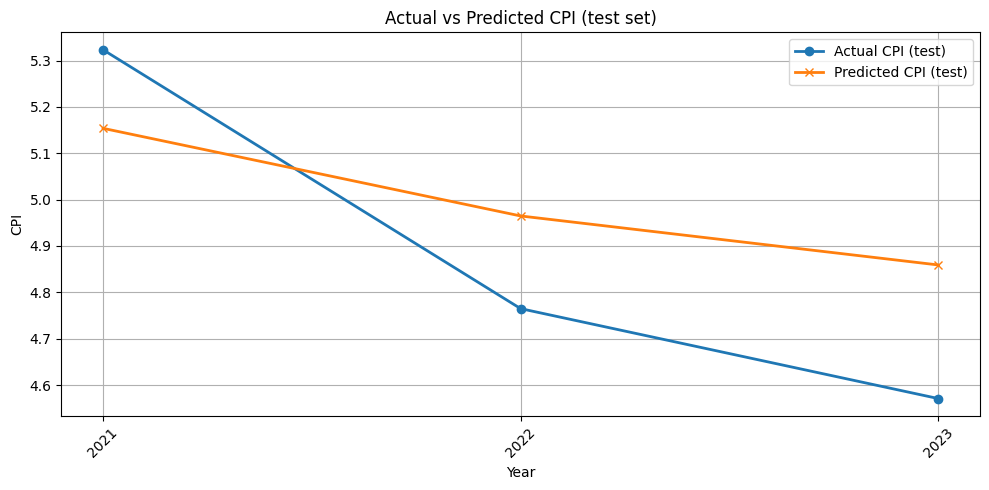

In [71]:
years_test = df_yearly['Year'].iloc[n_steps + train_size :].values  # indices that correspond to y_test
cmp_df = pd.DataFrame({
    'Year': years_test,
    'CPI_actual': y_test,
    'CPI_pred': y_pred
}).reset_index(drop=True)

print(cmp_df.head())

plt.figure(figsize=(10,5))
plt.plot(cmp_df['Year'], cmp_df['CPI_actual'], marker='o', linewidth=2, color='tab:blue', label='Actual CPI (test)')
plt.plot(cmp_df['Year'], cmp_df['CPI_pred'], marker='x', linewidth=2, color='tab:orange', label='Predicted CPI (test)')
plt.title('Actual vs Predicted CPI (test set)')
plt.xlabel('Year')
plt.ylabel('CPI')
plt.grid(True)
plt.legend()
plt.xticks(cmp_df['Year'], rotation=45)
plt.tight_layout()
plt.show()

In [78]:
import os
import joblib

In [76]:
project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
models_folder = os.path.join(project_root, 'models')
os.makedirs(models_folder, exist_ok=True)
model_path = os.path.join(models_folder, 'gru_model.h5')

In [77]:
model.save(model_path)
print(f"GRU model saved at: {model_path}")

GRU model saved at: c:\Web development\GRU-RNN_InflationModel\models\gru_model.h5


In [79]:
scaler = StandardScaler()

scaler_path = os.path.join(models_folder, 'scaler.save')
joblib.dump(scaler, scaler_path)
print(f"Scaler saved at: {scaler_path}")

Scaler saved at: c:\Web development\GRU-RNN_InflationModel\models\scaler.save
